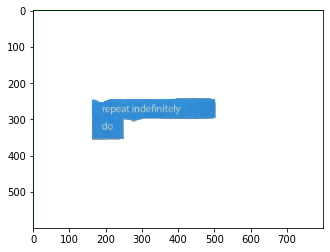

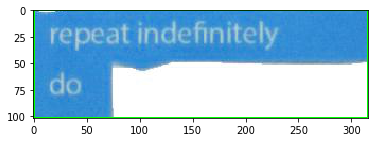

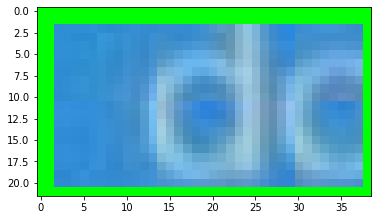

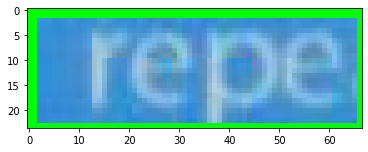

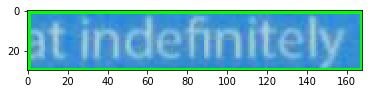

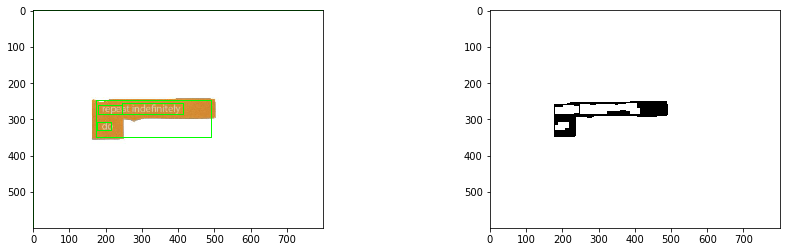

In [154]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pytesseract 
from pytesseract import Output
from difflib import SequenceMatcher

kernel = np.array( [[0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0],
                    [0, 1, 1, 1, 1, 1, 0],
                    [0, 1, 1, 1, 1, 1, 0],
                    [0, 1, 1, 1, 1, 1, 0],
                    [0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0]], np.uint8)
image = cv.imread('figure_2.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
_, th_feature = cv.threshold(gray, 0, 255, \
        cv.THRESH_BINARY+cv.THRESH_OTSU)
#th_feature = np.invert(th_feature)

#kernel = cv.getStructuringElement(cv.MORP ,(5, 5))
th_feature = cv.dilate(th_feature, kernel ,iterations = 7)

_, contours, _ = cv.findContours(th_feature, cv.RETR_TREE, \
            cv.CHAIN_APPROX_SIMPLE)

for cnt in contours: 
    x, y, w, h = cv.boundingRect(cnt) 
      
    # Drawing a rectangle on copied image 
    rect = cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2) 
    crop = image[y:y+h, x:x+w]
    gray_crop = cv.cvtColor(crop, cv.COLOR_BGR2GRAY)
    th_crop = cv.threshold(gray_crop, 0, 255, \
        cv.THRESH_BINARY+cv.THRESH_OTSU)
    plt.imshow(crop)
    plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax2.imshow(th_feature, cmap='gray')
plt.show()


